0.378
Dataset Dimensions are:
(16, 16, 16, 1) ()
Example Label:
tf.Tensor(0, shape=(), dtype=int64)
100/100 [==============================] - 0s 2ms/step
Predicted: [-2.1156669], Ground Truth: 0, Truly: 7
Predicted: [-6.949847], Ground Truth: 0, Truly: 2
Predicted: [-2.441056], Ground Truth: 0, Truly: 1
Predicted: [-2.6927586], Ground Truth: 0, Truly: 0
Predicted: [10.686481], Ground Truth: 1, Truly: 4
Predicted: [-1.5237315], Ground Truth: 1, Truly: 1
Predicted: [6.3914866], Ground Truth: 1, Truly: 4
Predicted: [5.4759345], Ground Truth: 1, Truly: 9
Predicted: [-2.2848773], Ground Truth: 1, Truly: 5
Predicted: [6.7561917], Ground Truth: 1, Truly: 9
Predicted: [-5.5186467], Ground Truth: 0, Truly: 0
Predicted: [-2.5100517], Ground Truth: 0, Truly: 6
Predicted: [5.4859653], Ground Truth: 1, Truly: 9
Predicted: [-1.199473], Ground Truth: 1, Truly: 0
Predicted: [-3.2106926], Ground Truth: 0, Truly: 1
Predicted: [-0.8257469], Ground Truth: 0, Truly: 5
Predicted: [5.205428], Ground Truth: 

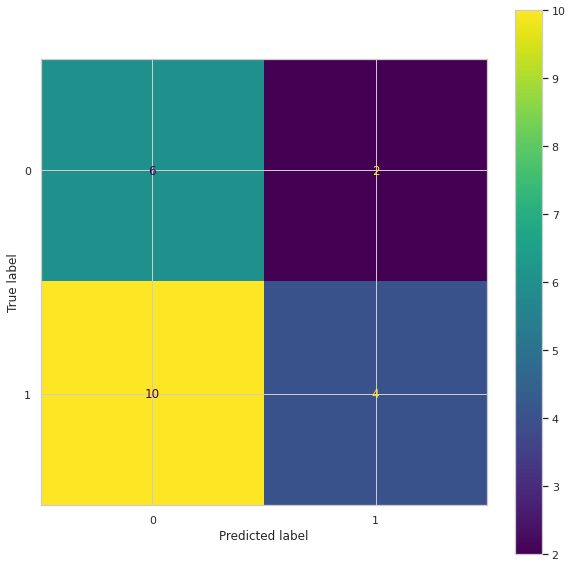

In [18]:
import mnist3d
import numpy as np
import tensorflow.keras as k
from Postprocessor import Postprocessing
import os
import tensorflow as tf

with tf.device("cpu:0"):
    name = "mconv1d_i_c_nb"
    mnist_data = mnist3d.MNISTDataHandler(frequency=False)
    train_dataset, val_dataset, test_dataset = mnist_data.create_dataset()
    set_to_eval = test_dataset
    model = k.models.load_model(f'savedModels/mnist_bkp')
    model_output = model.predict(
        set_to_eval.batch(1),
        verbose=1,
        use_multiprocessing=True
    )
    labels = []
    for ground_truth, predicted, gt2 in zip(set_to_eval, model_output, mnist_data.y_test_org):
        print(f"Predicted: {predicted}, Ground Truth: {ground_truth[1]}, Truly: {gt2}")
        labels.append(ground_truth[1].numpy())
    #pp = Postprocessing(model_output, mnist_data.y_test_org)
    pp = Postprocessing(model_output, mnist_data.y_test_org)
    pp.binary_confusion_matrix(threshold=0, name=os.path.join("/home/julius/Documents/masterarbeit/arbeit_figures/confusion_fourier", name))
    print(np.max(model_output))
    print(np.mean(model_output))
    print(np.mean(model_output[np.array(labels) == 1]))
    print(np.mean(model_output[np.array(labels) == 0]))

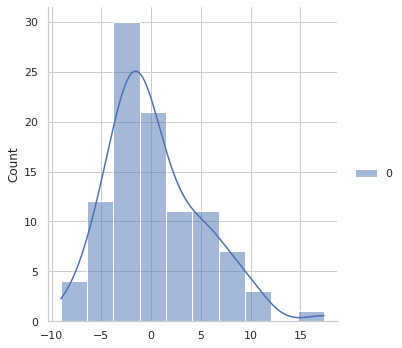

In [19]:
import seaborn as sns
sns.displot(model_output, bins=10, kde=True)

In [20]:
import pandas as pd
df = pd.DataFrame({"x":model_output.reshape(100, ), "color":mnist_data.y_test_org, "y":np.random.randint(0, 10, (100,))})

In [21]:
import matplotlib.pyplot as plt

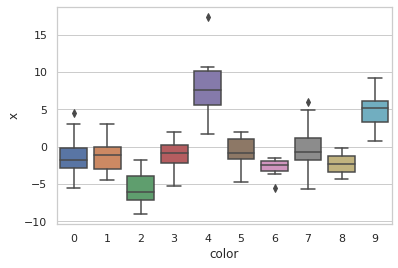

In [22]:
#sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="color", y="x", data=df)

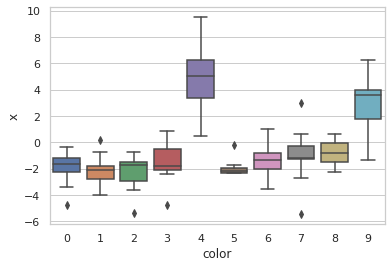

In [11]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="color", y="x", data=df)

In [195]:
df[df["color"] == 9]["x"].argmin()

7

In [196]:
df[df["color"] == 9]["x"]

7     2.332547
9     0.969706
12    4.370039
16    5.547345
20    3.375710
58    5.010282
62    4.239204
73   -4.593633
78    2.264645
92    1.966208
99    3.497930
Name: x, dtype: float32

In [208]:
a = test_dataset.skip(72).take(1)

tf.Tensor(0, shape=(), dtype=int64)


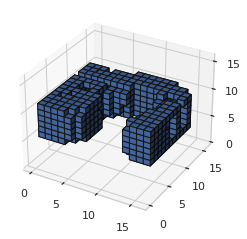

In [209]:
for elem in a:
    print(elem[1])
    mnist_data.plot_3dnumber(elem[0].numpy())

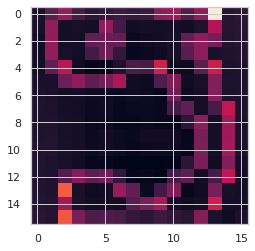

In [212]:
import tensorflow.keras as k

inp = elem[0].numpy()
import matplotlib.pyplot as plt
plt.imshow(inp[:, :, 9, 0])

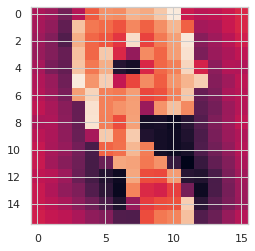

In [41]:
import matplotlib.pyplot as plt
plt.imshow(out.numpy()[:, :, 5, 0])